Runtime: 0:00:00.735407
kmeans centroids: [[117.64113617 -34.8884697 ]
 [-29.2742424    8.68177795]]
Runtime: 0:00:00.082617
sklearnkmeans centroids: [[-29.274244   8.68178 ]
 [117.64118  -34.88848 ]]


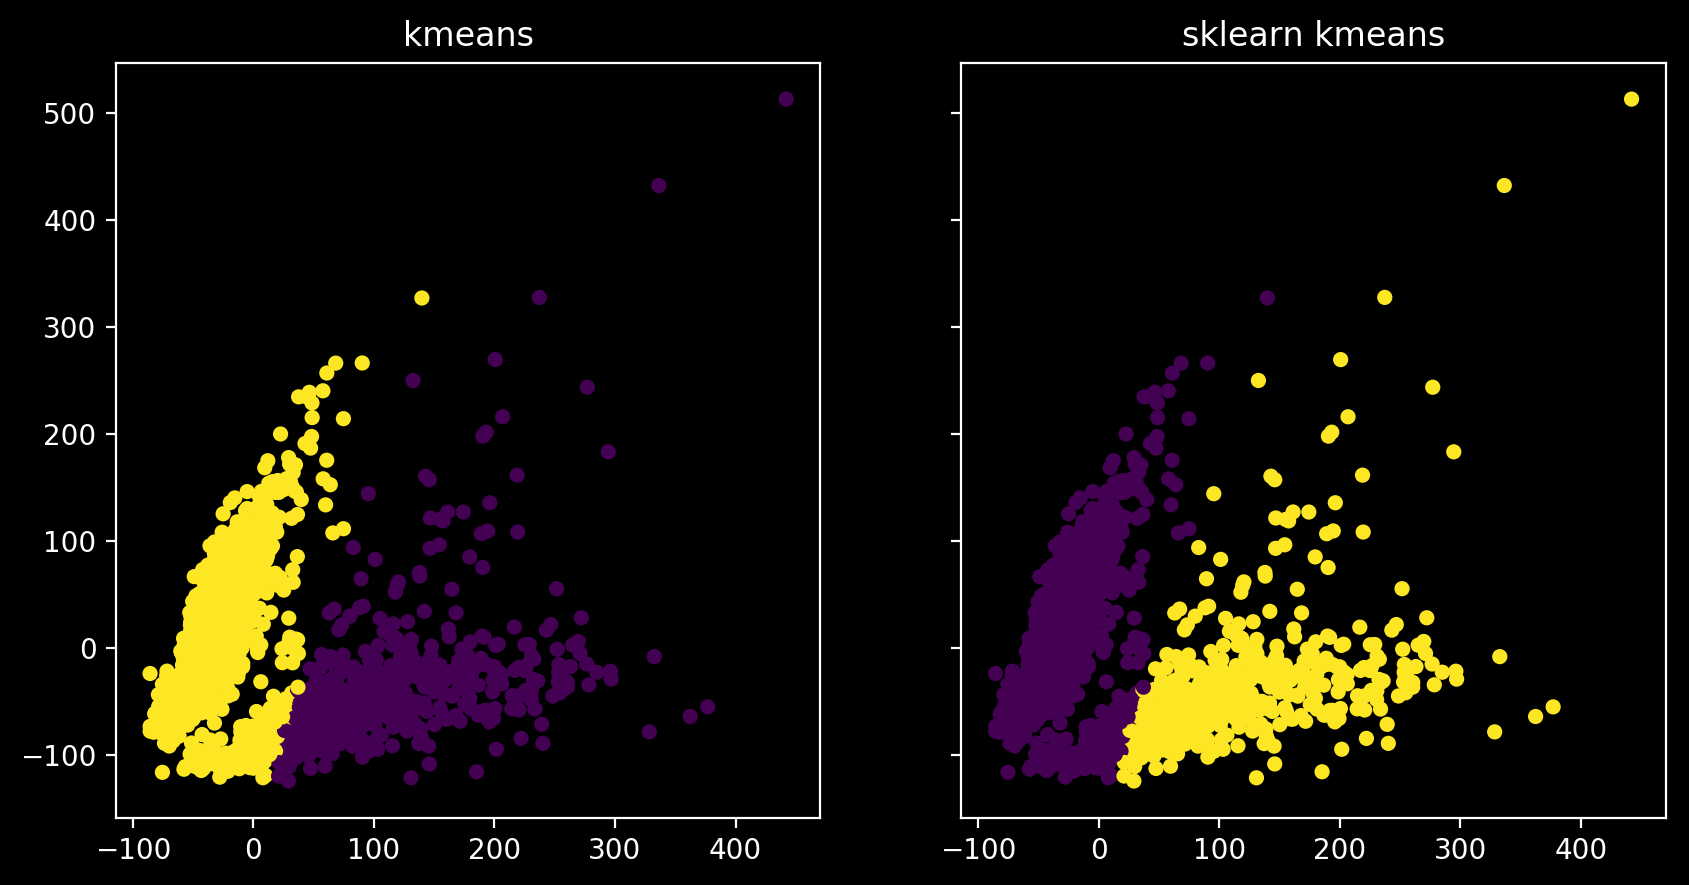

In [28]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking k patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids()
        assign_centroids()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(2, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=2).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)
